In [3]:
class Grafo:
    def __init__(self, nome_arquivo):
        arquivo = open(nome_arquivo)
        self.num_vertices = int(arquivo.readline())
        self.matriz = []

        for k in range(self.num_vertices):
            linhas = arquivo.readline().strip().split()
            self.matriz.append([int(n) for n in linhas])

        self.lista_adj = [[j for j in range(self.num_vertices) if self.matriz[i][j] == 1] for i in range(self.num_vertices)]
        arquivo.close()

    def matriz_adjacencia(self):
        print(self.matriz)
        return self.matriz

    def lista_adjacencia(self):
        print(self.lista_adj)
        return self.lista_adj

In [4]:
grafo = Grafo('graph_type1_1')
matriz = grafo.matriz_adjacencia()
lista_adj = grafo.lista_adjacencia()

[[0, 0, 1, 1, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 1, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 1, 0, 1, 0, 0, 0, 1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]
[[2, 3, 5], [4], [0, 6], [0, 4], [1, 3, 7], [0, 8, 9], [2], [4], [5], [5]]


In [5]:
import random
import copy

class Karger:
    def __init__(self, grafo):
        self.grafo = grafo
        self.V = list(range(len(self.grafo)))
        self.E = [(i, j) for i in range((len(self.grafo))) for j in range(i, (len(self.grafo))) if self.grafo[i][j] == 1]
        self.lista_adj = [[j for j in range((len(self.grafo))) if self.grafo[i][j] == 1] for i in range((len(self.grafo)))]

    def corte_minimo(self):
        self.super_node = {v: [v] for v in self.V}
        self.super_edges = {(u,v): [] for (u,v) in self.E}

        arestas_disponiveis = copy.deepcopy(self.E)

        while len(self.super_node) > 2:
            u, v = random.choice(arestas_disponiveis)
            arestas_disponiveis = self.merge(u, v, arestas_disponiveis)

        cont = 0
        super_nos_chaves = list(self.super_node.keys())
        for x in self.V:
          if  x in self.super_node[super_nos_chaves[0]]:
              for k in self.lista_adj[x]:
                if k in self.super_node[super_nos_chaves[1]]:
                  cont+=1
        return cont

    def merge(self, u, v, arestas_disp):
        novo_node = list(set(self.super_node[u] + self.super_node[v]))
        self.super_node.pop(u)
        self.super_node.pop(v)
        self.super_node[max(self.super_node) + 1] = novo_node

        novo_arestas_disponiveis = []
        for a, b in arestas_disp:
            if a in (u, v):
                a = max(self.super_node) if a in (u, v) else a
            if b in (u, v):
                b = max(self.super_node) if b in (u, v) else b
            if a != b:
                novo_arestas_disponiveis.append(sorted((a, b)))

        return novo_arestas_disponiveis

algoritmo_karger = Karger(matriz)
corte_min = algoritmo_karger.corte_minimo()
print("Tamanho mínimo do corte:", corte_min)

Tamanho mínimo do corte: 1


In [6]:
class Naive:
    def __init__(self, grafo):
      self.grafo = grafo
      self.V = list(range(len(self.grafo)))
      self.lista_adj = [[j for j in range((len(self.grafo))) if self.grafo[i][j] == 1] for i in range((len(self.grafo)))]

    def tamanho_corte(self):
      cores = ['blue','red']
      conjunto_cores = {v: random.choice(cores) for v in self.V}
      red = [k for k, v in conjunto_cores.items() if v == 'red']
      blue = [k for k, v in conjunto_cores.items() if v == 'blue']

      if len(red) == 0:
          x = blue[0]
          red.append(x)
          blue.remove(x)

      elif len(blue) == 0:
          x = red[0]
          blue.append(x)
          red.remove(x)

      conjuntos = {"blue":blue, "red": red}
      cont = 0
      cores_conjuntos = list(conjuntos.keys())

      for x in self.V:
        if  x in conjuntos[cores_conjuntos[0]]:
            for k in self.lista_adj[x]:
              if k in conjuntos[cores_conjuntos[1]]:
                cont+=1

      return cont


algoritmo_naive = Naive(matriz)
tam_corte = algoritmo_naive.tamanho_corte()
print("Tamanho do corte:", tam_corte)

Tamanho do corte: 2


In [7]:
class IteraCorteMin:
    def __init__(self, grafo, num_iteracoes):
        self.grafo = grafo
        self.num_iteracoes = num_iteracoes

    def exec_karger(self):
        melhor_corte = len(self.grafo)
        karger = Karger(self.grafo)
        for i in range(self.num_iteracoes):
            novo_corte = karger.corte_minimo()
            if novo_corte < melhor_corte:
                melhor_corte = novo_corte
        return melhor_corte

    def exec_naive(self):
        melhor_corte = len(self.grafo)
        naive = Naive(self.grafo)
        for i in range(self.num_iteracoes):
            novo_corte = naive.tamanho_corte()
            if novo_corte < melhor_corte:
                melhor_corte = novo_corte
        return melhor_corte


iter_corte_min = IteraCorteMin(matriz, 100)
print("Melhor corte Karger: ", iter_corte_min.exec_karger())
print("Melhor corte Naive: ", iter_corte_min.exec_naive())

Melhor corte Karger:  1
Melhor corte Naive:  1


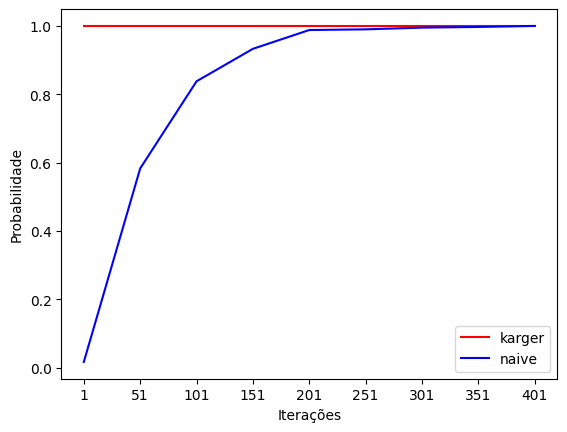

In [11]:
import matplotlib.pyplot as plt
import math

class Plot:
    def __init__(self, matriz, nome_arquivo):
      self.matriz = matriz
      self.nome_arquivo = nome_arquivo
      self.arquivo = open(self.nome_arquivo)
      self.corte_min = int(self.arquivo.readline())
      self.arquivo.close()
      self.exec = 1000

    def probKarger(self):
        cont = 0
        prob = 0
        iter = 1
        lista_iter, lista_prob = [], []

        while prob < 1:
            for i in range(self.exec):
                corte_karger = IteraCorteMin(self.matriz, iter)
                resultado_corte_karger = corte_karger.exec_karger()

                if resultado_corte_karger == self.corte_min:
                    cont+=1

            prob = cont/self.exec
            lista_prob.append(prob)
            lista_iter.append(iter)
            iter+=20
            cont = 0

        return lista_iter, lista_prob

    def probNaive(self):
        cont = 0
        prob = 0
        iter = 1
        lista_iter, lista_prob = [], []

        while prob < 1 :
            for i in range(self.exec):
                corte_naive = IteraCorteMin(self.matriz, iter)
                resultado_corte_naive = corte_naive.exec_naive()

                if resultado_corte_naive == self.corte_min:
                    cont+=1

            prob = cont/self.exec
            lista_prob.append(prob)
            lista_iter.append(iter)

            if len(lista_prob) > 1 and iter > 501 and abs(lista_prob[-1] - lista_prob[-2]) < 0.01:
                break

            iter+=50
            cont = 0

        return lista_iter, lista_prob

    def plot(self):
        karger_iter, karger_prob = self.probKarger()
        naive_iter, naive_prob = self.probNaive()
        karger_prob.append(karger_prob[-1])
        karger_iter.append(naive_iter[-1])
        plt.plot(karger_iter, karger_prob, color = 'red',label='karger')
        plt.plot(naive_iter, naive_prob, color = 'blue',label='naive')
        plt.ylabel('Probabilidade')
        plt.xlabel('Iterações')
        plt.legend()
        plt.xticks(naive_iter)

        plt.show()


grafico_corte_minimo = Plot(matriz, '/content/graph_type1_1 out')
grafico_corte_minimo.plot()